In [1]:
import pandas as pd
import numpy

In [82]:
df = pd.read_csv('../Data/dataset1.csv')
# Convert 'Yes' to 1 and 'No' to 0 in the 'Rain' column
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})
# Save the modified dataset to a new CSV file
df.to_csv('rainfall.csv', index=False)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    int64  
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [84]:
df.shape

(366, 12)

In [85]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [86]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [87]:
import matplotlib.pyplot as plt

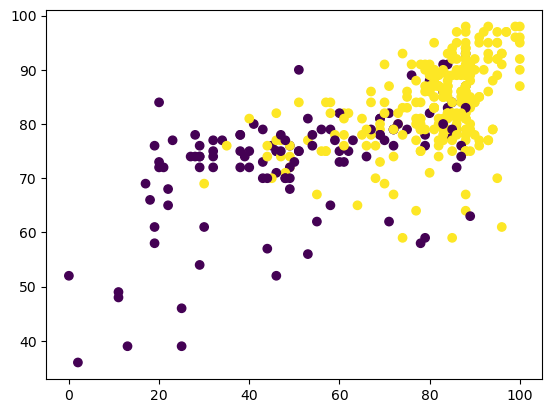

In [113]:
plt.scatter(df['cloud '],df['humidity '],c=df['rainfall'])

In [114]:
x = df[['cloud ', 'humidity ']]
y = df['rainfall']

In [115]:
x

,cloud,humidity
0,49,72
1,83,81
2,91,95
3,88,90
4,81,95
...,...,...
361,90,84
362,85,75
363,78,75
364,86,78


In [116]:
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [118]:
print(x_train)
print(y_test)
print(y_train)
print(x_test)

     cloud   humidity 
358      70         91
12       34         77
217      27         74
67       88         93
70       93         77
..      ...        ...
90       83         86
257      46         71
51       82         77
251      60         75
181      83         80

[329 rows x 2 columns]
104    1
342    1
120    1
3      1
78     1
300    0
325    0
361    1
318    1
141    1
140    1
266    1
350    0
6      0
95     1
286    1
85     0
66     1
1      1
96     0
132    1
121    1
124    1
309    1
60     0
21     1
337    1
61     0
231    0
331    0
65     0
248    0
8      0
164    1
234    1
2      1
336    1
Name: rainfall, dtype: int64
358    1
12     0
217    0
67     0
70     1
      ..
90     0
257    0
51     1
251    0
181    1
Name: rainfall, Length: 329, dtype: int64
     cloud   humidity 
104      88         98
342      90         78
120      89         80
3        88         90
78       85         94
300      48         77
325      83         80
361      90  

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler = StandardScaler()

In [121]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.0553761 ,  1.08797236],
       [-1.71162477, -0.30673977],
       [-2.03367313, -0.60560665],
       [ 0.77274824,  1.28721694],
       [ 1.00278278, -0.30673977],
       [-0.60745899,  0.1913717 ],
       [ 0.77274824,  0.1913717 ],
       [ 0.81875515, -0.10749518],
       [ 0.03663772, -0.40636207],
       [ 0.72674133,  0.98835006],
       [ 0.63472752,  1.18759465],
       [-0.92950734, -0.50598436],
       [-1.98766622, -0.60560665],
       [-0.101383  , -0.10749518],
       [-1.11353497, -0.30673977],
       [ 0.35868607, -0.40636207],
       [ 1.1408035 , -1.90069649],
       [-0.0553761 , -1.10371813],
       [-0.92950734, -0.50598436],
       [-0.42343136, -0.50598436],
       [-0.28541063,  0.09174941],
       [ 0.17465844,  0.290994  ],
       [ 0.58872061,  0.68948318],
       [ 0.58872061,  0.68948318],
       [ 0.5427137 ,  0.49023859],
       [-0.101383  ,  0.09174941],
       [ 0.77274824,  0.09174941],
       [ 0.68073443,  1.18759465],
       [-1.02152116,

In [122]:
x_test = scaler.transform(x_test)
x_test

array([[ 0.77274824,  1.78532842],
       [ 0.86476206, -0.20711748],
       [ 0.81875515, -0.00787289],
       [ 0.77274824,  0.98835006],
       [ 0.63472752,  1.38683924],
       [-1.06752806, -0.30673977],
       [ 0.5427137 , -0.00787289],
       [ 0.86476206,  0.39061629],
       [ 0.12865154,  0.290994  ],
       [ 0.26667226,  0.78910547],
       [ 0.77274824,  1.38683924],
       [-1.43558333,  0.09174941],
       [-2.76978365, -3.09616402],
       [-0.6994728 , -0.10749518],
       [ 0.31267917,  1.08797236],
       [-0.14738991, -1.00409583],
       [-2.26370766, -1.20334042],
       [ 0.22066535,  1.08797236],
       [ 0.5427137 ,  0.09174941],
       [ 0.5427137 ,  1.08797236],
       [ 0.31267917, -0.00787289],
       [ 0.86476206,  1.18759465],
       [ 0.4967068 ,  0.68948318],
       [ 0.4967068 , -0.00787289],
       [-1.2975626 , -0.70522895],
       [ 1.32483113,  1.18759465],
       [ 1.00278278, -0.30673977],
       [-1.80363859, -0.80485124],
       [-0.56145208,

In [123]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [124]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [125]:
y_pred = clf.predict(x_test)

In [126]:
y_test

104    1
342    1
120    1
3      1
78     1
300    0
325    0
361    1
318    1
141    1
140    1
266    1
350    0
6      0
95     1
286    1
85     0
66     1
1      1
96     0
132    1
121    1
124    1
309    1
60     0
21     1
337    1
61     0
231    0
331    0
65     0
248    0
8      0
164    1
234    1
2      1
336    1
Name: rainfall, dtype: int64

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
accuracy_score(y_test,y_pred)

0.7837837837837838

In [56]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 651.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 581.0 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 708.1 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 708.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 724.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 827.5 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 774.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 774.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 774.0 kB/s eta 0:00:02
   -------- -

In [129]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

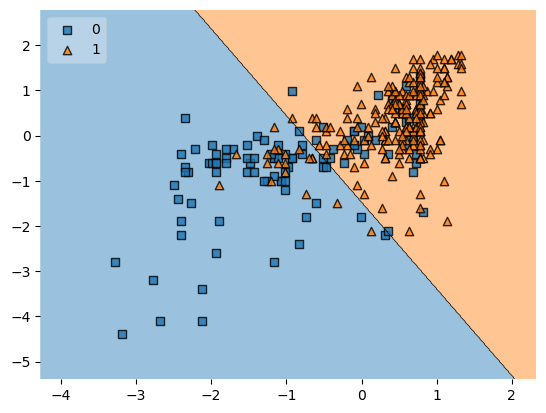

In [130]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [131]:
import pickle

In [132]:
pickle.dump(clf,open('model.pkl','wb'))